# Non-Text Data Exploration

In [1]:
!pip install pandas-profiling[notebook]
!pip install nltk
!pip install textblob

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [3]:
# Read in MakeupAlley Reviews dataset
products = pd.read_csv('data/products.csv')
products.head()

,index,product,user_id,age,date,review,ratings,repurchase,packaging,price
0,0,Blush - Orgasm,kyl77,36-43,21 days ago,This blush is suppose to be a universally flat...,5.0,65%,4.1,4
1,1,Blush - Orgasm,ladyinred29,44-55,25 days ago,This blush is a beautiful color. It isn't ter...,3.0,65%,4.1,4
2,2,Blush - Orgasm,BougieAngel,30-35,a month ago,After purchasing this I didn't want to touch i...,4.0,65%,4.1,4
3,3,Blush - Orgasm,Leahmoriah4,44-55,2 months ago,"I'm 48, Caucasian with olive undertones so tru...",5.0,65%,4.1,4
4,4,Blush - Orgasm,Avalonian1172,30-35,3 months ago,I have to mention that the case is fabulous. A...,4.0,65%,4.1,4


In [4]:
# quick data exploration with pandas profiling
profile = ProfileReport(products, title="MakeUpAlley Pandas Profiling Report", explorative=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
print(products.shape)
print(products.info())

(10351, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10351 entries, 0 to 10350
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   df_index    10351 non-null  int64  
 1   product     10351 non-null  object 
 2   user_id     10351 non-null  object 
 3   age         10104 non-null  object 
 4   date        10351 non-null  object 
 5   review      10351 non-null  object 
 6   ratings     10351 non-null  float64
 7   repurchase  10351 non-null  object 
 8   packaging   10351 non-null  float64
 9   price       10351 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 808.8+ KB
None


In [6]:
# Check for presence of NaN values
products.isnull().sum()

df_index        0
product         0
user_id         0
age           247
date            0
review          0
ratings         0
repurchase      0
packaging       0
price           0
dtype: int64

In [7]:
# Replace rows with null values using most frequent Age Group
mode_age = products['age'].value_counts().head(1).index[0]
products['age'] = products['age'].fillna(mode_age)

# Check if there's still any null values
products.isnull().sum()

df_index      0
product       0
user_id       0
age           0
date          0
review        0
ratings       0
repurchase    0
packaging     0
price         0
dtype: int64

In [8]:
products['product'].value_counts()
# Most popular product is Blush - Orgasm

Blush - Orgasm         5332
Blush - Deep Throat    1165
Blush - Sin             766
Blush - Torrid          497
Blush - Exhibit A       371
Blush - Amour           310
Blush - Luster          302
Blush - Angelika        297
Mata Hari Blush         272
Blush - Taj Mahal       262
Super Orgasm            249
Blush - Madly           248
Blush - Dolce Vita      155
Blush - Sex Appeal      125
Name: product, dtype: int64

In [9]:
products['user_id'].value_counts()
# Drop this feature because too many values but possible to explore if a user writing more reviews lead to higher likelihood of repurchasing

LayoverLifestyle    13
kathrynb23          12
JGardella           11
carrasco            10
izzybella            9
                    ..
NARSGlow             1
Karistona            1
joc267               1
frezgirl             1
AquaGlitz            1
Name: user_id, Length: 7956, dtype: int64

In [10]:
products['date'].value_counts()
# Drop '14 years ago' and above, regroup 'months ago' rows as 'a year ago'

11 years ago     1337
12 years ago     1236
10 years ago     1117
13 years ago      880
17 years ago      759
16 years ago      719
9 years ago       699
14 years ago      697
15 years ago      673
18 years ago      633
8 years ago       542
7 years ago       336
6 years ago       228
5 years ago       141
19 years ago      132
4 years ago        81
3 years ago        48
2 years ago        34
20 years ago       25
a year ago         18
7 months ago        3
8 months ago        2
3 months ago        2
10 months ago       2
a month ago         1
21 days ago         1
25 days ago         1
2 months ago        1
9 months ago        1
5 months ago        1
6 months ago        1
Name: date, dtype: int64

In [11]:
products['price'].value_counts()
# Drop this feature because not useful

4    10351
Name: price, dtype: int64

In [12]:
products['ratings'].value_counts()
# This will be our target variable, will be changing it to binary instead

5.0    5563
4.0    2393
3.0    1403
2.0     673
1.0     319
Name: ratings, dtype: int64

In [13]:
products['age'].value_counts()

19-24        3994
25-29        2539
30-35        1601
36-43         873
Under 18      872
44-55         384
56 & Over      88
Name: age, dtype: int64

In [14]:
products['packaging'].value_counts()
# Convert to string since there are few numerical values so that we treat this as a categorical variable instead

4.1    5581
4.2    2351
4.3    2109
4.4     310
Name: packaging, dtype: int64

In [15]:
products['repurchase'].value_counts()
# Convert to string since there are few numerical values so that we treat this as a categorical variable instead

65%    5332
79%    1490
81%    1413
86%    1178
88%     302
85%     262
57%     249
75%     125
Name: repurchase, dtype: int64

In [16]:
# Convert numeric columns to categorical
products['ratings'] = products['ratings'].astype(str)
products['packaging'] = products['packaging'].astype(str)

# Check if they are converted correctly
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10351 entries, 0 to 10350
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   df_index    10351 non-null  int64 
 1   product     10351 non-null  object
 2   user_id     10351 non-null  object
 3   age         10351 non-null  object
 4   date        10351 non-null  object
 5   review      10351 non-null  object
 6   ratings     10351 non-null  object
 7   repurchase  10351 non-null  object
 8   packaging   10351 non-null  object
 9   price       10351 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 808.8+ KB


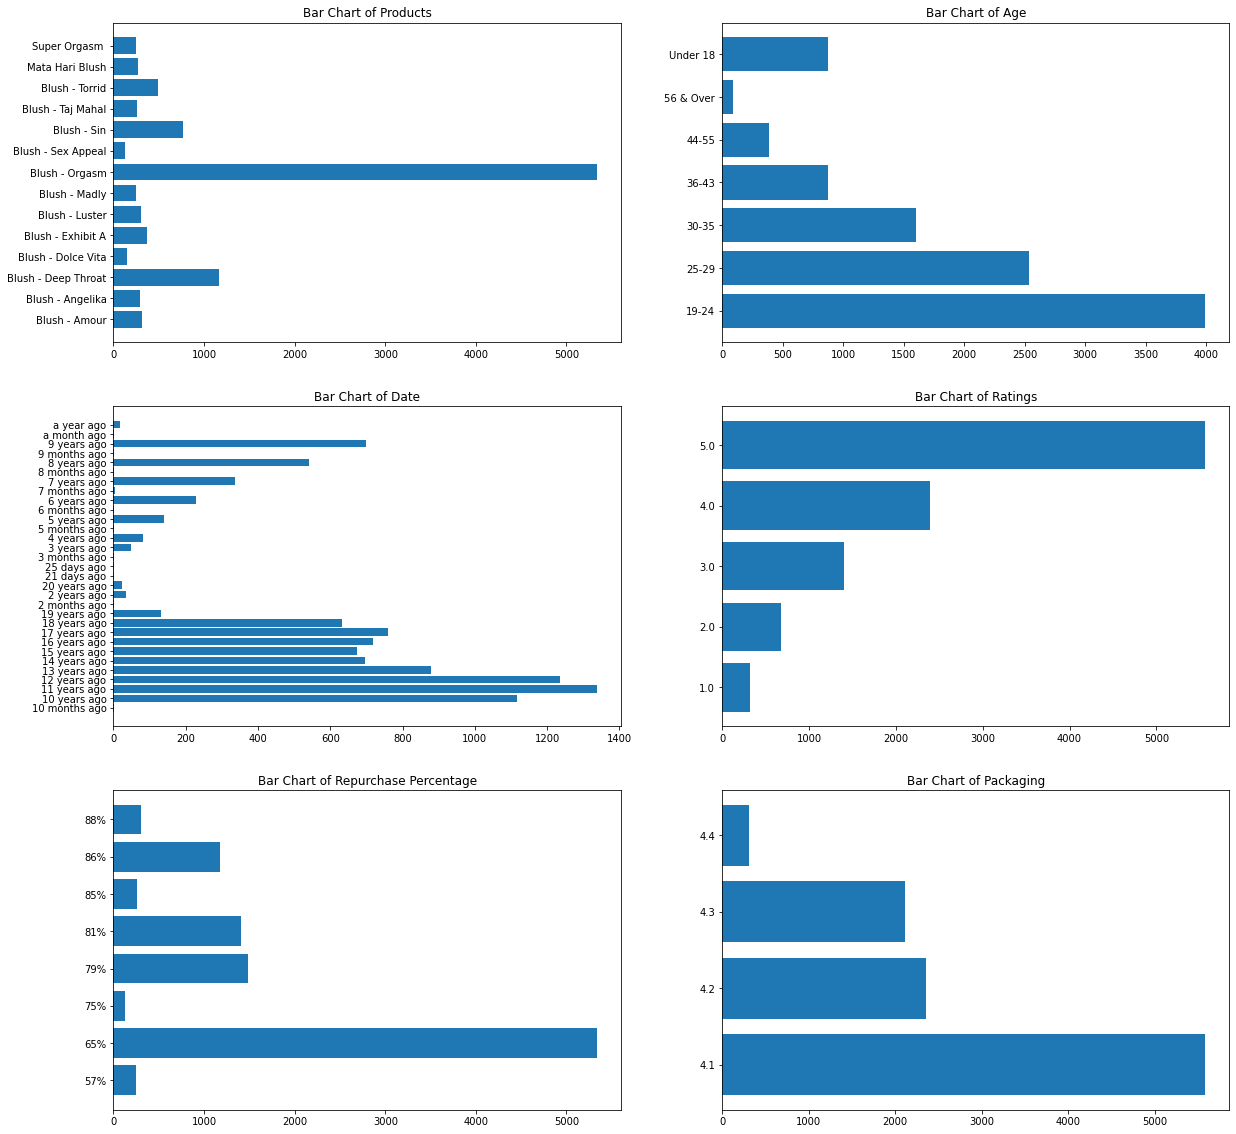

In [17]:
# Plot distribution for Product, Age, Date, Ratings, Repurchase and Packaging
fig, ax = plt.subplots(3,2,figsize=(20,20))

ax[0,0].barh(products['product'].value_counts().sort_index().index,products['product'].value_counts().sort_index().values)
ax[0,0].title.set_text('Bar Chart of Products')
ax[0,1].barh(products['age'].value_counts().sort_index().index,products['age'].value_counts().sort_index().values)
ax[0,1].title.set_text('Bar Chart of Age')

ax[1,0].barh(products['date'].value_counts().sort_index().index,products['date'].value_counts().sort_index().values)
ax[1,0].title.set_text('Bar Chart of Date')
ax[1,1].barh(products['ratings'].value_counts().sort_index().index,products['ratings'].value_counts().sort_index().values)
ax[1,1].title.set_text('Bar Chart of Ratings')

ax[2,0].barh(products['repurchase'].value_counts().sort_index().index,products['repurchase'].value_counts().sort_index().values)
ax[2,0].title.set_text('Bar Chart of Repurchase Percentage')
ax[2,1].barh(products['packaging'].value_counts().sort_index().index,products['packaging'].value_counts().sort_index().values)
ax[2,1].title.set_text('Bar Chart of Packaging')

# Most of the reviewers are millennials (reasonable, follows expectations)
# Repurchase percentages are generally quite high (all >= 50%)
# Overall Ratings are also generally quite high (more than half gave 5/5)
# Packaging rating also generally quite high (at least 4/5 stars)
# Reasonable and follows expectations because NARS is a famous makeup brand with high quality pigmented products

# Text Data Exploration

In [18]:
from langdetect import detect
from wordcloud import WordCloud
import re

In [19]:
# Check for random sample of reviews
pd.set_option('display.max_colwidth', 200)
products['review'].sample(n=10)

4786    A GREAT pink shimmer shade. This can go with so many skin tones! As with all NARS blushes, there is definitly great quality. I have tan/olive skin, and this gives me a natural looking flush, inste...
5450                                                                                                                                        This is amazing. Great quality. Can't wait to try other shades!!!!!
3320    I like this product. For me, it's more of a highlighter than it is a blush. To be completely honest, I am a NARS Orgasm junkie. I have the blush, multiple, and lipgloss. I guess anything peachy/pi...
6718    I really want to buy it since so many people love it. I realized that only certain groups of people write reviews on products. I'm guessing people with warmer skin tones review this blush. I'm NC2...
5024       waaaay too pink for my medium,yellowish skin tone and red hair(dyed)...looks garrish on me..wasnt worth the price ...looks alot like the drugstore colors by 

count    10351.000000
mean       449.610859
std        348.451299
min          0.000000
25%        232.000000
50%        366.000000
75%        567.000000
max       6000.000000
Name: review_length, dtype: float64


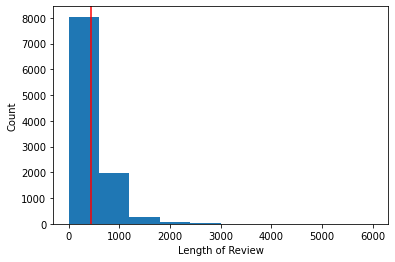

In [20]:
products['review_length'] = products['review'].apply(lambda x: len(x.strip()))

plt.hist(products['review_length'])
plt.xlabel('Length of Review')
plt.ylabel('Count')
plt.axvline(x=products['review_length'].mean(), color='red')
print(products['review_length'].describe())

# Most reviews have sufficient number of characters for analysis

In [21]:
# Check for review with 0 length
products[products['review_length'] == 0]

,df_index,product,user_id,age,date,review,ratings,repurchase,packaging,price,review_length
466,696,Blush - Orgasm,oppositeofdog,Under 18,7 years ago,,5.0,65%,4.1,4,0


In [22]:
# Remove the review 
products = products[products['review_length'] > 0]

In [23]:
# Check if reviews are in English
products['english'] = products['review'].apply(lambda x: detect(x) == 'en')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
products['english'].value_counts()

True     10326
False       24
Name: english, dtype: int64

In [25]:
# Check for random sample of Non-English reviews
products[products['english'] == False].sample(n=5)

,df_index,product,user_id,age,date,review,ratings,repurchase,packaging,price,review_length,english
2953,4428,Blush - Orgasm,lisagibb,25-29,13 years ago,love it!,5.0,65%,4.1,4,8,False
4554,6830,Blush - Orgasm,DELILAHIZ1ST,19-24,16 years ago,"love the pink, makes me look i just had an orgasm.",5.0,65%,4.1,4,51,False
512,767,Blush - Orgasm,mariacristinatoca,36-43,7 years ago,Amazing!,5.0,65%,4.1,4,8,False
3702,5552,Blush - Orgasm,beachbb,19-24,14 years ago,"HG! (MMM, NC20-30, blonde/green)",5.0,65%,4.1,4,32,False
126,186,Blush - Orgasm,AnnaScrimgeour,25-29,5 years ago,Good,5.0,65%,4.1,4,4,False


In [26]:
# Check for random sample of English reviews
products[products['english'] == True].sample(n=5)

,df_index,product,user_id,age,date,review,ratings,repurchase,packaging,price,review_length,english
3892,5837,Blush - Orgasm,Lolliebollie,25-29,15 years ago,"I received this blush in a swap with the lovely Tabitha and I'm sold! It's a fabulous blush! At first I thought it would be too pink for me (don't really like girly stuff), but after reading some ...",5.0,65%,4.1,4,353,True
8024,12044,Mata Hari Blush,YouGotYourChocolateinMyPB,30-35,12 years ago,"Me: NC15, GA LSF #2, Diorskin Nude #010. Combo skin<p>Very similar to Desire but a little more bubble gum pink than Desire (which has a hint of plum to it.) No shimmer. If you're pale, then use...",5.0,79%,4.3,4,257,True
6304,9459,Blush - Deep Throat,elusivelotus,19-24,16 years ago,My HG blush. Gives me a lovely glow ( medium asian with yellow undertones) and has good staying power. So beautiful. Perfect!,5.0,81%,4.2,4,125,True
4061,6091,Blush - Orgasm,daydreamer3,19-24,15 years ago,This is my favorite blush-- EVER. It looks beautiful on my fair/light olive skin. It's a gorgeous peachy-pink shade that's perfect for every day wear. I think that this blush would look great on a...,5.0,65%,4.1,4,301,True
7906,11871,Super Orgasm,beauxgoris,30-35,12 years ago,"UGH yet another NARS hyped product that is ""all hat no cattle"" as we say. This looks awful on: like shimmery dirt with chunks of glitter in it. They're got to be making enough on the original - bu...",1.0,57%,4.1,4,276,True


In [27]:
# Drop Non-English reviews
products = products[products['english'] == True].drop(['english'], axis=1)

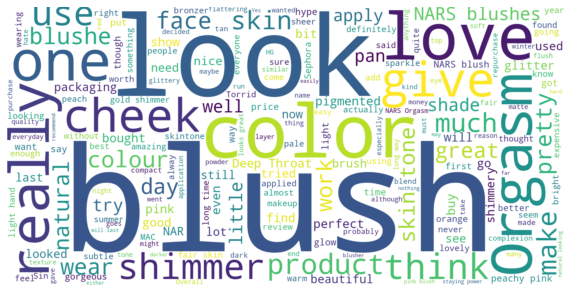

In [28]:
# Wordcloud
all_reviews = " ".join(r for r in products['review'])

# Create and generate a word cloud image
wordcloud = WordCloud(background_color="white", width=2000, height=1000).generate(all_reviews)

# Display the generated image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
# Top 20 Words
tokens = products['review'].apply(lambda row: row.split(" "))

words = tokens.apply(lambda y: pd.value_counts(re.findall('([\s]\w+[\s])',' '.join(y))))\
                  .sum(axis=0)\
                  .to_frame()\
                  .reset_index()\
                  .sort_values(by=0,ascending=False)

words.columns = ['word','occurences']

words.head(20)

,word,occurences
1765,I,22402.0
3363,a,14085.0
3604,and,13446.0
10075,the,12494.0
6913,it,10856.0
6903,is,7792.0
10176,to,7740.0
10110,this,7295.0
4268,but,7020.0
7685,my,6583.0


# Non-Text Data Pre-processing

In [30]:
# Drop not useful columns
products.drop(columns=['df_index','price','user_id'], inplace=True)

In [31]:
# Drop data from more than 13 years ago and regroup 'months ago' rows to 'a year ago'
# Drop older years and group months to first year
products['date'] = products['date'].apply(lambda x: x.split(" ")[0] if 'year' in x else 1)
products['date'] = products['date'].apply(lambda x: 1 if x=='a' else int(x))
products['date'] = products['date'].apply(lambda x: -int(x))
products = products[products['date'] >= -13]

In [32]:
# Check if the dates are formatted correctly
products['date'].value_counts()

-11    1335
-12    1234
-10    1115
-13     877
-9      699
-8      541
-7      332
-6      228
-5      140
-4       81
-3       48
-1       34
-2       32
Name: date, dtype: int64

In [33]:
# Relabel 'ratings' column to repurchase again (1) if ratings 4/5 else won't repurchase again (0)
products['repurchase_again'] = products['ratings'].apply(lambda x: 0 if float(x) < 4 else 1 )
products.drop(['ratings'], axis=1, inplace=True)
products.head()

,product,age,date,review,repurchase,packaging,review_length,repurchase_again
0,Blush - Orgasm,36-43,-1,"This blush is suppose to be a universally flattering color. I'm not sure if that is actually possible, but I do think it would flatter a lot of different skin tones. I'm fair with cool undertones,...",65%,4.1,565,1
1,Blush - Orgasm,44-55,-1,"This blush is a beautiful color. It isn't terribly pigmented imho, but it gives a lovely glow on my fair, cool skin, and it is luminescent.\n\nThe problem I have with this product is the packagin...",65%,4.1,574,0
2,Blush - Orgasm,30-35,-1,"After purchasing this I didn't want to touch it coz it was soo pretty! I love the colour, pigment and texture, and the packaging is also awesome. Not much into makeup but blush is always in my bea...",65%,4.1,331,1
3,Blush - Orgasm,44-55,-1,"I'm 48, Caucasian with olive undertones so true pinks and mauves look terrible and corals are perfect which is why I LOVE this blush. I love the shimmer on my cheek bones and temples and use Clin...",65%,4.1,893,1
4,Blush - Orgasm,30-35,-1,I have to mention that the case is fabulous. All my other blushes are great but the case breaks towards the end of its use. This one is strong. Still together. Why can't other brands make their ca...,65%,4.1,331,1


In [34]:
products['repurchase_again'].value_counts()
# No need to account for class imbalance

1    5067
0    1629
Name: repurchase_again, dtype: int64

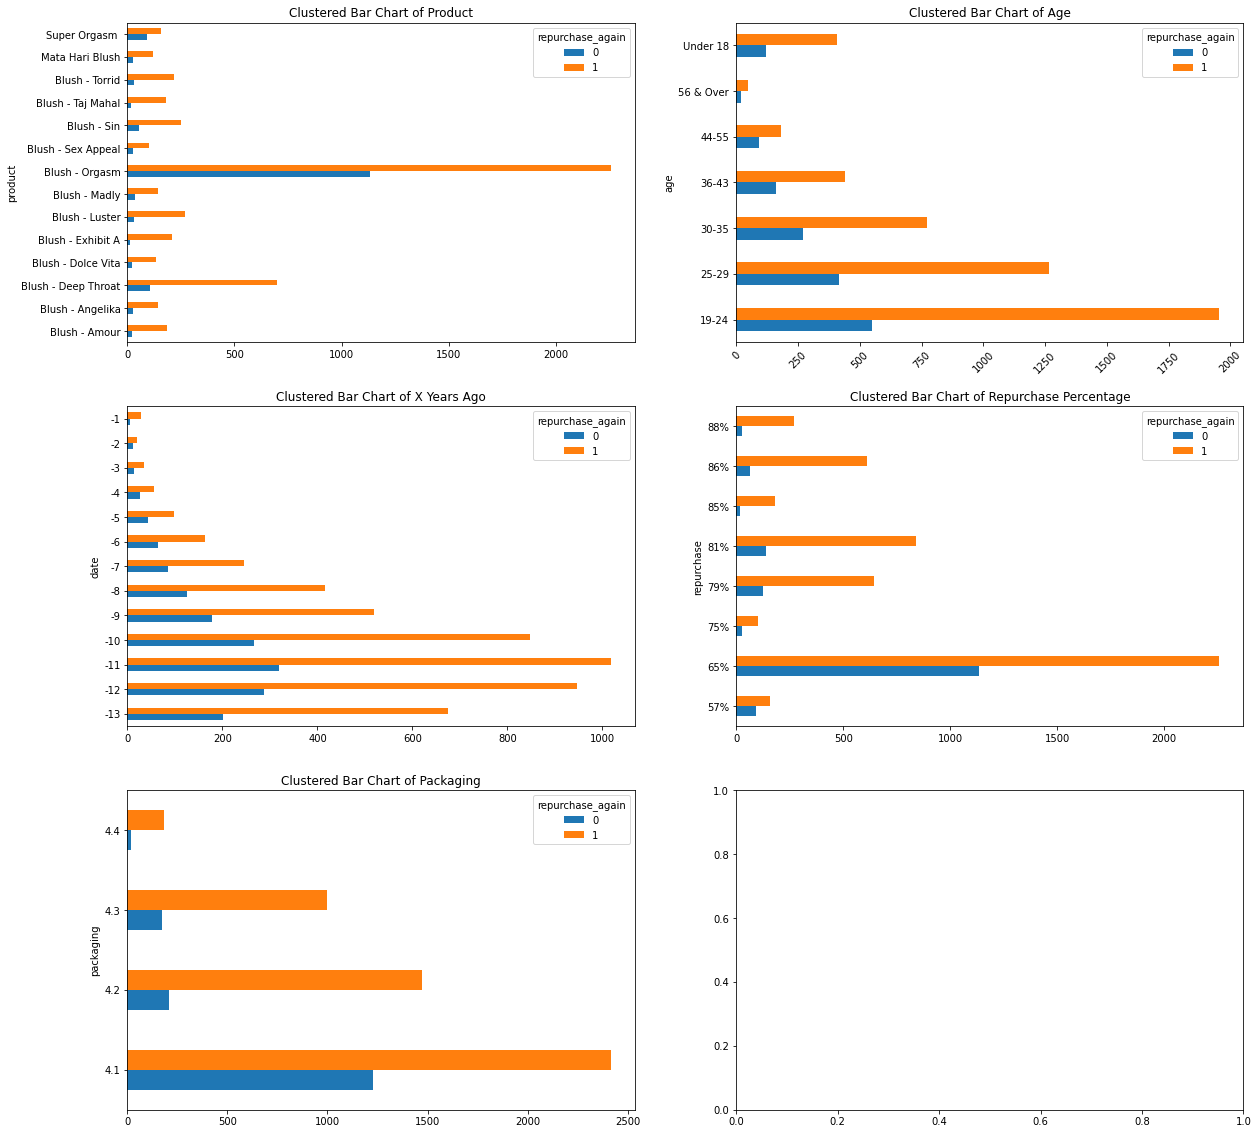

In [35]:
# Plot distribution for Product, Age, Date, Repurchase and Packaging
fig, ax = plt.subplots(3,2,figsize=(20,20))
products.groupby(['product','repurchase_again'])['repurchase_again'].count().unstack().plot(kind='barh',ax=ax[0,0])
ax[0,0].title.set_text('Clustered Bar Chart of Product')
ax[0,0].tick_params(axis='x', labelrotation=0)

products.groupby(['age','repurchase_again'])['repurchase_again'].count().unstack().plot(kind='barh',ax=ax[0,1])
ax[0,1].title.set_text('Clustered Bar Chart of Age')
ax[0,1].tick_params(axis='x', labelrotation=45)

products.groupby(['date','repurchase_again'])['repurchase_again'].count().unstack().plot(kind='barh',ax=ax[1,0])
ax[1,0].title.set_text('Clustered Bar Chart of X Years Ago')
ax[1,0].tick_params(axis='x', labelrotation=0)

products.groupby(['repurchase','repurchase_again'])['repurchase_again'].count().unstack().plot(kind='barh',ax=ax[1,1])
ax[1,1].title.set_text('Clustered Bar Chart of Repurchase Percentage')
ax[1,1].tick_params(axis='x', labelrotation=0)

products.groupby(['packaging','repurchase_again'])['repurchase_again'].count().unstack().plot(kind='barh',ax=ax[2,0])
ax[2,0].title.set_text('Clustered Bar Chart of Packaging')
ax[2,0].tick_params(axis='x', labelrotation=0)

# Generally, most people are willing to repurchase in every category
# 65% Repurchase Percentage, Blush - Orgasm and 4.1 Packaging Rating have a much higher proportion of those not willing to repurchase; should analyze these groups 

# Text Data Preprocessing

In [36]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from textblob import TextBlob, Word

[nltk_data] Downloading package stopwords to /Users/min/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/min/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [37]:
# Remove line breaks
def remove_breaks(text):
  text = re.sub(r'\r', '', text)
  return re.sub(r'\n', '', text)

products['review_processed'] = products['review'].apply(lambda x: remove_breaks(x))

In [38]:
# Remove links
def remove_urls(text):
  text = re.sub(r'http.?://[^\s]+[\s]?', '', text)
  text = re.sub(r'[^\s]+.com', '', text)
  return re.sub(r'www.[^\s]+', '', text)

products['review_processed'] = products['review_processed'].apply(lambda x: remove_urls(x))

In [39]:
# Covert to lowercase
products['review_processed_lower'] = products['review_processed'].apply(lambda x: x.lower())

In [40]:
# Expand Contractions
contractions_dict = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

# Function to perform expansion of contractions
def expand_contractions(text, contraction_mapping=contractions_dict):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

products['review_processed'] = products['review_processed'].apply(lambda x : expand_contractions(x,contractions_dict))
products['review_processed_lower'] = products['review_processed_lower'].apply(lambda x : expand_contractions(x,contractions_dict))

In [41]:
# Remove punctuations
products['review_processed_lower_punc'] = products['review_processed_lower'].str.replace('[^\w\s]','')
products['review_processed_punc'] = products['review_processed'].str.replace('[^\w\s]','')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
# Remove digits (including words that contain digits because makeup products)
products['review_processed'] = products['review_processed'].apply(lambda x: re.sub('\w*\d\w*','', x))
products['review_processed_lower'] = products['review_processed_lower'].apply(lambda x: re.sub('\w*\d\w*','', x))
products['review_processed_lower_punc'] = products['review_processed_lower_punc'].apply(lambda x: re.sub('\w*\d\w*','', x))
products['review_processed_punc'] = products['review_processed_punc'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [43]:
# Lemmatization
products['review_processed'] = products['review_processed'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split(" ")]))
products['review_processed_lower'] = products['review_processed_lower'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split(" ")]))
products['review_processed_lower_punc'] = products['review_processed_lower_punc'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split(" ")]))
products['review_processed_punc'] = products['review_processed_punc'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split(" ")]))

In [44]:
# Remove extra whitespaces
products['review_processed'] = products['review_processed'].apply(lambda x: x.strip())
products['review_processed_lower'] = products['review_processed_lower'].apply(lambda x: x.strip())
products['review_processed_lower_punc'] = products['review_processed_lower_punc'].apply(lambda x: x.strip())
products['review_processed_punc'] = products['review_processed_punc'].apply(lambda x: x.strip())

In [45]:
# Check sample of preprocessed reviews
review_sample = products[['review', 'review_processed', 'review_processed_lower', 'review_processed_lower_punc', 'review_processed_punc']].sample(n=10)
review_sample

,review,review_processed,review_processed_lower,review_processed_lower_punc,review_processed_punc
1715,"I think this is probably the highest rated blushes out there so I wanted to try it on for myself. I love the pink, I love the shimmer and I love the way it accentuates my skin tone. I use a little...","I think this is probably the highest rated blush out there so I wanted to try it on for myself. I love the pink, I love the shimmer and I love the way it accentuates my skin tone. I use a little o...","i think this is probably the highest rated blush out there so i wanted to try it on for myself. i love the pink, i love the shimmer and i love the way it accentuates my skin tone. i use a little o...",i think this is probably the highest rated blush out there so i wanted to try it on for myself i love the pink i love the shimmer and i love the way it accentuates my skin tone i use a little on a...,I think this is probably the highest rated blush out there so I wanted to try it on for myself I love the pink I love the shimmer and I love the way it accentuates my skin tone I use a little on a...
1537,"Overall Rating - 5\r\nPrice - 2\r\nPackaging Quality - 5 \r\nWould you buy this product again? - Yes\r\n\r\nFor reference, I'm NW15/NW20 with normal, slightly dry skin. I have blue eyes with natur...","Overall Rating - - Quality - Would you buy this product again? - YesFor reference, I am / with normal, slightly dry skin. I have blue eye with naturally straight, long eyelash that have a sligh...","overall rating - - quality - would you buy this product again? - yesfor reference, i am / with normal, slightly dry skin. i have blue eye with naturally straight, long eyelash that have a sligh...",overall rating quality would you buy this product again yesfor reference i am with normal slightly dry skin i have blue eye with naturally straight long eyelash that have a slight curl i h...,Overall Rating Quality Would you buy this product again YesFor reference I am with normal slightly dry skin I have blue eye with naturally straight long eyelash that have a slight curl I h...
1829,I wanted this blush for years but never wanted to pay the rediculous price for it. Well since sephora has a amazing return policy I thought I would try it out and if I really didn't like it I coul...,I wanted this blush for year but never wanted to pay the rediculous price for it. Well since sephora ha a amazing return policy I thought I would try it out and if I really did not like it I could...,i wanted this blush for year but never wanted to pay the rediculous price for it. well since sephora ha a amazing return policy i thought i would try it out and if i really did not like it i could...,i wanted this blush for year but never wanted to pay the rediculous price for it well since sephora ha a amazing return policy i thought i would try it out and if i really did not like it i could ...,I wanted this blush for year but never wanted to pay the rediculous price for it Well since sephora ha a amazing return policy I thought I would try it out and if I really did not like it I could ...
7595,"I won't repeat what others have said about NARS blush quality - finely milled, heavily pigmented but blendable, and longlasting - and neither will I comment about the silly dust attracting materia...","I will not repeat what others have said about NARS blush quality - finely milled, heavily pigmented but blendable, and longlasting - and neither will ment about the silly dust attracting material ...","i will not repeat what others have said about nars blush quality - finely milled, heavily pigmented but blendable, and longlasting - and neither will ment about the silly dust attracting material ...",i will not repeat what others have said about nars blush quality finely milled heavily pigmented but blendable and longlasting and neither will ment about the silly dust attracting material they...,I will not repeat what others have said about NARS blush quality finely milled heavily p

# Feature Engineering

In [46]:
from sklearn import preprocessing
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/min/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [47]:
# Conduct One-hot Encoding for Product and Age because they are nominal data (have to remove 1 dummy variable column to remove multi-collinearity problem)
products = pd.concat([products, pd.get_dummies(products['product'], prefix='product', drop_first=True)], axis=1)
products = pd.concat([products, pd.get_dummies(products['age'], prefix='age', drop_first=True)], axis=1)
products.drop(columns=['product','age'], inplace=True)

In [48]:
# Conduct Label Encoding for Packaging and Repurchase Percentage because they are ordinal data 
label_encoder = preprocessing.LabelEncoder()
products['packaging'] = label_encoder.fit_transform(products['packaging'])
products['repurchase'] = label_encoder.fit_transform(products['repurchase'])

In [49]:
products

,date,review,repurchase,packaging,review_length,repurchase_again,review_processed,review_processed_lower,review_processed_lower_punc,review_processed_punc,...,product_Blush - Taj Mahal,product_Blush - Torrid,product_Mata Hari Blush,product_Super Orgasm,age_25-29,age_30-35,age_36-43,age_44-55,age_56 & Over,age_Under 18
0,-1,"This blush is suppose to be a universally flattering color. I'm not sure if that is actually possible, but I do think it would flatter a lot of different skin tones. I'm fair with cool undertones,...",1,0,565,1,"This blush is suppose to be a universally flattering color. I am not sure if that is actually possible, but I do think it would flatter a lot of different skin tones. I am fair with cool undertone...","this blush is suppose to be a universally flattering color. i am not sure if that is actually possible, but i do think it would flatter a lot of different skin tones. i am fair with cool undertone...",this blush is suppose to be a universally flattering color i am not sure if that is actually possible but i do think it would flatter a lot of different skin tone i am fair with cool undertone and...,This blush is suppose to be a universally flattering color I am not sure if that is actually possible but I do think it would flatter a lot of different skin tone I am fair with cool undertone and...,...,0,0,0,0,0,0,1,0,0,0
1,-1,"This blush is a beautiful color. It isn't terribly pigmented imho, but it gives a lovely glow on my fair, cool skin, and it is luminescent.\n\nThe problem I have with this product is the packagin...",1,0,574,0,"This blush is a beautiful color. It is not terribly pigmented imho, but it give a lovely glow on my fair, cool skin, and it is luminescent.The problem I have with this product is the packaging. ...","this blush is a beautiful color. it is not terribly pigmented imho, but it give a lovely glow on my fair, cool skin, and it is luminescent.the problem i have with this product is the packaging. ...",this blush is a beautiful color it is not terribly pigmented imho but it give a lovely glow on my fair cool skin and it is luminescentthe problem i have with this product is the packaging i have...,This blush is a beautiful color It is not terribly pigmented imho but it give a lovely glow on my fair cool skin and it is luminescentThe problem I have with this product is the packaging I have...,...,0,0,0,0,0,0,0,1,0,0
2,-1,"After purchasing this I didn't want to touch it coz it was soo pretty! I love the colour, pigment and texture, and the packaging is also awesome. Not much into makeup but blush is always in my bea...",1,0,331,1,"After purchasing this I did not want to touch it coz it wa soo pretty! I love the colour, pigment and texture, and the packaging is also awesome. Not much into makeup but blush is always in my bea...","after purchasing this i did not want to touch it coz it wa soo pretty! i love the colour, pigment and texture, and the packaging is also awesome. not much into makeup but blush is always in my bea...",after purchasing this i did not want to touch it coz it wa soo pretty i love the colour pigment and texture and the packaging is also awesome not much into makeup but blush is always in my beauty ...,After purchasing this I did not want to touch it coz it wa soo pretty I love the colour pigment and texture and the packaging is also awesome Not much into makeup but blush is always in my beauty ...,...,0,0,0,0,0,1,0,0,0,0
3,-1,"I'm 48, Caucasian with olive undertones so true pinks and mauves look terrible and corals are perfect which is why I LOVE this blush. I love the shimmer on my cheek bones and temples and use Clin...",1,0,893,1,"I am , Caucasian with olive undertone so true pink and mauve look terrible and coral are perfect which is why I LOVE this blush. I love the shimmer on my cheek bone and temple and use Clinique Ch...","i am , caucasian with olive undertone so true pink and mauve look terrible and coral are perfect which is why i love this blush. i love 

In [50]:
# Initialise VADER Sentiment Analyser
analyzer = SentimentIntensityAnalyzer()

Check whether lowercase and punctuations affect VADER sentiment score

In [51]:
review_sample_scores = pd.DataFrame(columns = ['Text']+list(review_sample.columns))

for row in range(len(review_sample)):
    result = {}
    
    for col in review_sample.columns:
        vs = analyzer.polarity_scores(review_sample[col].iloc[row])
        result[col] = vs['compound']
    
    review_sample_scores = review_sample_scores.append(result, ignore_index=True)
    
review_sample_scores['Text'] = review_sample['review'].reset_index(drop=True)



In [52]:
review_sample_scores

,Text,review,review_processed,review_processed_lower,review_processed_lower_punc,review_processed_punc
0,"I think this is probably the highest rated blushes out there so I wanted to try it on for myself. I love the pink, I love the shimmer and I love the way it accentuates my skin tone. I use a little...",0.9668,0.9668,0.9668,0.9668,0.9668
1,"Overall Rating - 5\r\nPrice - 2\r\nPackaging Quality - 5 \r\nWould you buy this product again? - Yes\r\n\r\nFor reference, I'm NW15/NW20 with normal, slightly dry skin. I have blue eyes with natur...",0.9885,0.9878,0.9878,0.9875,0.9875
2,I wanted this blush for years but never wanted to pay the rediculous price for it. Well since sephora has a amazing return policy I thought I would try it out and if I really didn't like it I coul...,-0.6192,-0.2288,-0.2288,-0.0839,-0.0839
3,"I won't repeat what others have said about NARS blush quality - finely milled, heavily pigmented but blendable, and longlasting - and neither will I comment about the silly dust attracting materia...",0.9932,0.9912,0.9912,0.9917,0.9917
4,"I love this blush. My first and favorite. Very beautiful color that is very flattering. On good days when my skin isn't acting up, I put this on a well-moisturized face with no foundation or powde...",0.9920,0.9815,0.9815,0.9876,0.9890
5,"This is a no brainer blush for me. If I have no idea what to put on or am in a rush, this will be it. I love the formula of Nars blushes and will buy more when I have the $ because the quality is ...",-0.9612,-0.9595,-0.9595,-0.9595,-0.9595
6,Love this blush! I alternate between this and orgasm. Deep throat is more pink than orgasm and has a faint sheen rather than the glittery effect of orgasm so it's perfect for every day wear. The c...,0.8952,0.9095,0.9095,0.9039,0.9039
7,"The first time I tried this I only did it to see what all of the hype was about. I have blonde hair and fair to medium skin with red undertones which I am always covering up, so In my opinion how...",0.9750,0.9750,0.9750,0.9750,0.9750
8,Pinky peach color with gold shimmer but the shimmer is very fine and doesn't look too obvious on the face.\r\n\r\nSome people say it's more pink but it's peachier than pink on me. Not dark nor sup...,0.9252,0.9252,0.9252,0.9252,0.9252
9,"I love this blush ! beautiful peachy pick tone not too pink or too orange ,it does have a lot of shimmer in it however i do not find it looks glittery on my skin ,its much more a glow/sheen to the...",0.8553,0.8553,0.8553,0.8442,0.8442


**i think vader score works best with unprocessed data coz vader helps to process it alr somehow HAHAHH should we use vader for sentiment scores? then can use the processed ones for feature engineering below** 

In [53]:
# Create new features
products['polarity'] = products['review_processed'].apply(lambda x: TextBlob(x).sentiment.polarity)
products['subjectivity'] = products['review_processed'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
products['word_count'] = products['review_processed'].apply(lambda x: len(str(x).split(" ")))
products['char_count'] = products['review_processed'].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
products['avg_word_length'] = products['char_count'] / products['word_count']

In [54]:
products.reset_index(inplace=True)

In [55]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6696 entries, 0 to 6695
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        6696 non-null   int64  
 1   date                         6696 non-null   int64  
 2   review                       6696 non-null   object 
 3   repurchase                   6696 non-null   int64  
 4   packaging                    6696 non-null   int64  
 5   review_length                6696 non-null   int64  
 6   repurchase_again             6696 non-null   int64  
 7   review_processed             6696 non-null   object 
 8   review_processed_lower       6696 non-null   object 
 9   review_processed_lower_punc  6696 non-null   object 
 10  review_processed_punc        6696 non-null   object 
 11  product_Blush - Angelika     6696 non-null   uint8  
 12  product_Blush - Deep Throat  6696 non-null   uint8  
 13  product_Blush - Do

In [56]:
print("5 Random Reviews with Highest Polarity:")
for index,review in enumerate(products.iloc[products['polarity'].sort_values(ascending=False)[:5].index]['review_processed']):
  print('Review {}:\n'.format(index+1),review)

print("5 Random Reviews with Highest Subjectivity:")
for index,review in enumerate(products.iloc[products['subjectivity'].sort_values(ascending=False)[:5].index]['review_processed']):
  print('Review {}:\n'.format(index+1),review)

5 Random Reviews with Highest Polarity:
Review 1:
 Great with a tan!
Review 2:
 This is my favorite blush ever!!!!! The color is literally perfect.
Review 3:
 AMAZING!!!   #thatisall
Review 4:
 People said this product the best seller or something great to have!!!but this blush doe not work of me!!
Review 5:
 My HG blush! Looks beautiful and glowy on my  skin!
5 Random Reviews with Highest Subjectivity:
Review 1:
 nice colour e off very easily
Review 2:
 Although it look pretty sitting there on the nordstrom counter NARS display, when I took it home and put it on it wa not anything special..the gold sheen you see in it doe not show up on the skin and the color is something you can get at a drugstore..way to overrated.
Review 3:
 This is a very beautiful color, I can just use it with every look I choose. NARS is now my fav. blush brand
Review 4:
 WORST INGREDIENTS EVER!!
Review 5:
 Perfect blush for me.


In [57]:
print("5 Random Reviews with Lowest Polarity:")
for index,review in enumerate(products.iloc[products['polarity'].sort_values(ascending=True)[:5].index]['review_processed']):
  print('Review {}:\n'.format(index+1),review)

print("5 Random Reviews with Lowest Subjectivity:")
for index,review in enumerate(products.iloc[products['subjectivity'].sort_values(ascending=True)[:5].index]['review_processed']):
  print('Review {}:\n'.format(index+1),review)

5 Random Reviews with Lowest Polarity:
Review 1:
 WORST INGREDIENTS EVER!!
Review 2:
 WORST BLUSH EVER! The sparkle are awful. Why doe NARS insist on putting glitter in their blushes?!
Review 3:
 Horrible color if you have oily skin.. make you look soooo shiny!  Also.. glitter fall all over your face and the blush broke apart in my purse after like one week!  Glitter everywhere!  hated it...
Review 4:
 I have fair-medium ish skin and am a blush-a-holic!  After reading ton of review about this blush I bought it.  It did nothing for me, it did not even show up : ( I wa bummed.
Review 5:
 This blush showed up a dirty and dull on my / skin. Like some people have said, it almost ha a bruise like effect! Horrible.
5 Random Reviews with Lowest Subjectivity:
Review 1:
 This Blush color rock period
Review 2:
 Looks like i got punch in the face...I would not mend this for my NC  lady out there
Review 3:
 This just doe not work for me. Its just to shimmery and I feel like it doe not apply well. T

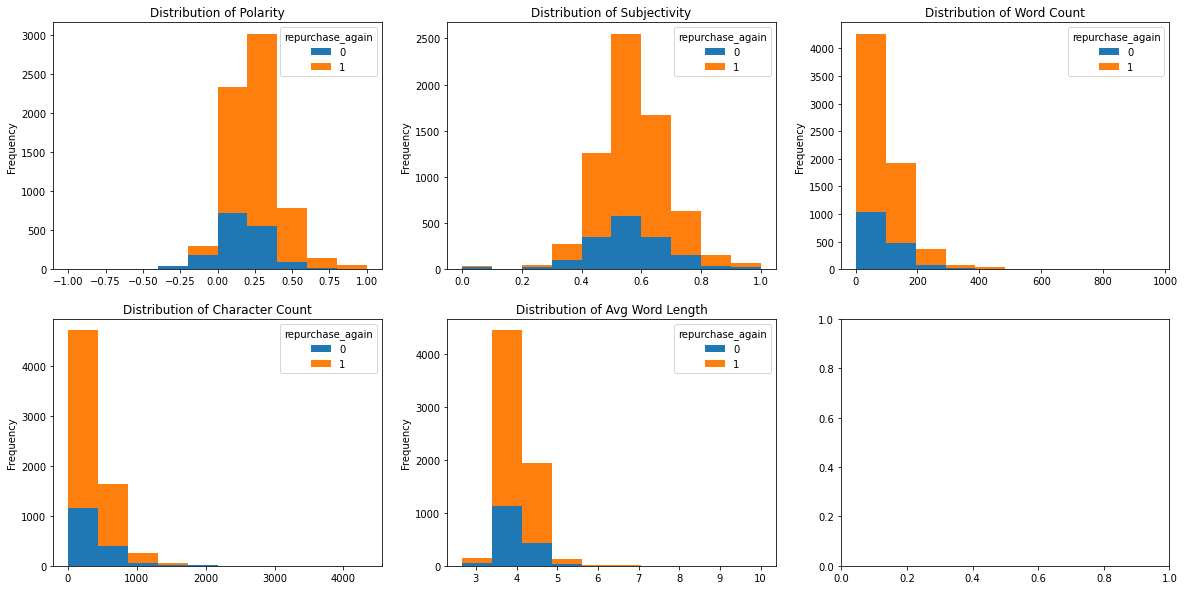

In [58]:
# Histogram of new features
fig, ax = plt.subplots(2,3,figsize=(20,10))
products.pivot(columns='repurchase_again').polarity.plot(kind = 'hist',stacked=True,ax=ax[0,0])
ax[0,0].title.set_text('Distribution of Polarity')
products.pivot(columns='repurchase_again').subjectivity.plot(kind = 'hist',stacked=True, ax=ax[0,1])
ax[0,1].title.set_text('Distribution of Subjectivity')
products.pivot(columns='repurchase_again').word_count.plot(kind = 'hist',stacked=True,ax=ax[0,2])
ax[0,2].title.set_text('Distribution of Word Count')
products.pivot(columns='repurchase_again').char_count.plot(kind = 'hist',stacked=True,ax=ax[1,0])
ax[1,0].title.set_text('Distribution of Character Count')
products.pivot(columns='repurchase_again').avg_word_length.plot(kind = 'hist',stacked=True,ax= ax[1,1])
ax[1,1].title.set_text('Distribution of Avg Word Length')

<AxesSubplot:title={'center':'avg_word_length'}, xlabel='repurchase_again'>

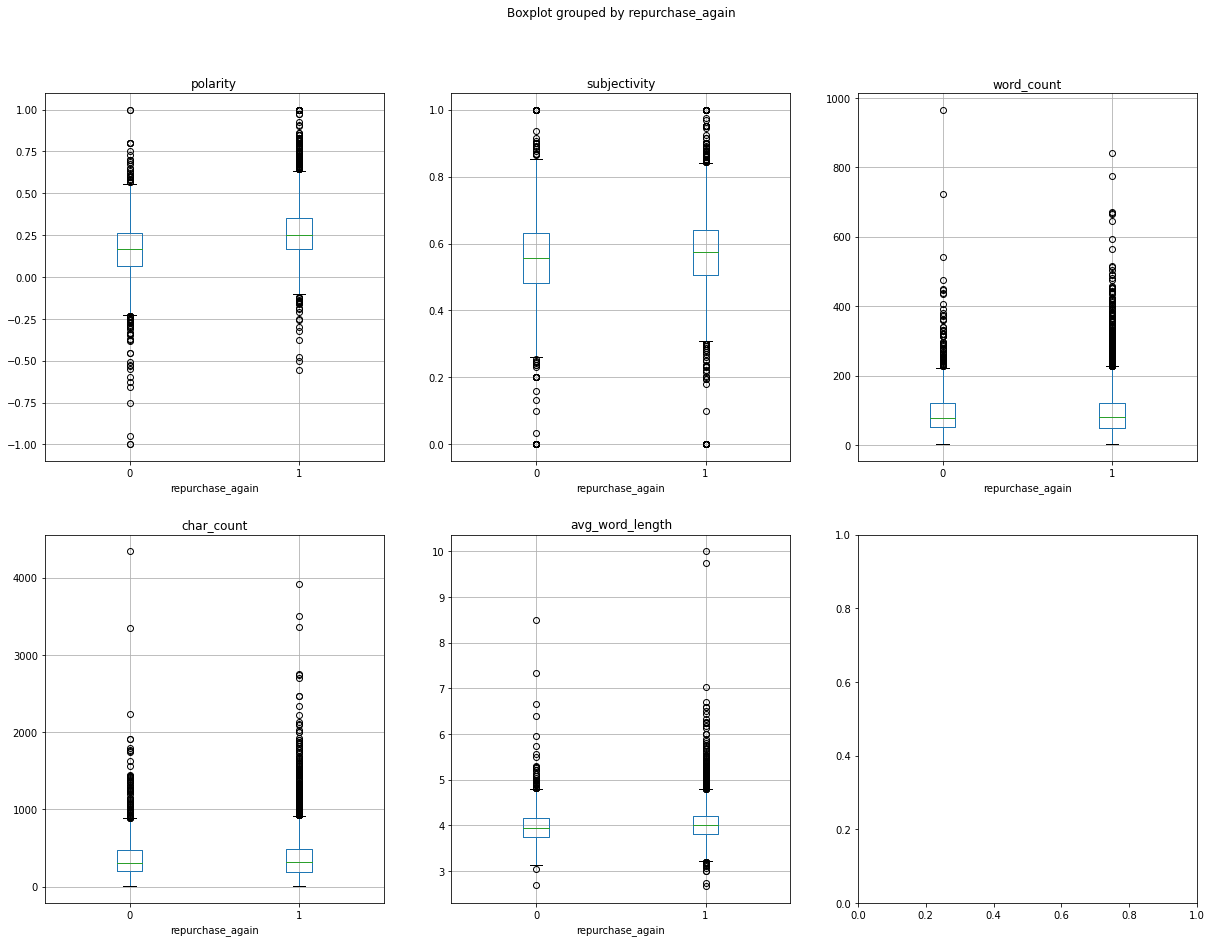

In [59]:
# Boxplot of new features
fig, ax = plt.subplots(2,3,figsize=(20,15))
products.boxplot('polarity',by='repurchase_again',ax=ax[0,0])
products.boxplot('subjectivity',by='repurchase_again',ax=ax[0,1])
products.boxplot('word_count',by='repurchase_again',ax=ax[0,2])
products.boxplot('char_count',by='repurchase_again',ax=ax[1,0])
products.boxplot('avg_word_length',by='repurchase_again',ax=ax[1,1])

# Those who repurchase again have higher polarity, higher subjectivity, similar word count, similar character count, higher average word length compared to those who don't repurchase again

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

NameError: name 'X' is not defined

In [ ]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)